# Visualisation du dataset Covertype avec l'algorithme UMAP

In [4]:
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from umap import ParametricUMAP
import umap
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [5]:
# fetch dataset
covertype = fetch_ucirepo(id=31)

# data
X = covertype.data.features
y = covertype.data.targets

In [7]:
print(X.shape)
print(y.shape)

print(y.Cover_Type.value_counts())

(581012, 54)
(581012, 1)
Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


In [9]:
# Réduire la taille de la base de donnée
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.5, stratify=y, random_state=42)
print(X_sample.shape)
print(y_sample.shape)
print(y_sample.Cover_Type.value_counts())

(290506, 54)
(290506, 1)
Cover_Type
2    141650
1    105920
3     17877
7     10255
6      8684
5      4746
4      1374
Name: count, dtype: int64


In [10]:
### Standardiser données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

In [12]:
# Over-sampling avec SMOTE
sm = SMOTE(random_state=42, k_neighbors=3)
X_oversampled, y_oversampled = sm.fit_resample(X_scaled, y_sample)

In [13]:
print("After over-sampling: ")
print(y_oversampled.Cover_Type.value_counts())

After over-sampling: 
Cover_Type
1    141650
2    141650
7    141650
3    141650
5    141650
6    141650
4    141650
Name: count, dtype: int64


In [ ]:
### Algorithme UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(X_oversampled, y_oversampled)
embedding.shape

C:\Users\helen\source\repos_git\TP2-Apprentissage_automatique\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


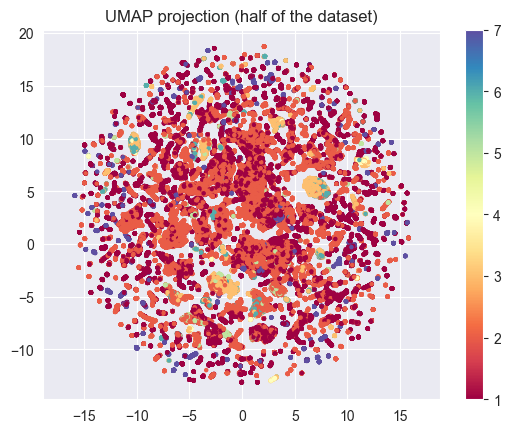

In [20]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_oversampled.Cover_Type, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar()
#plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(7))
plt.title('UMAP projection (half of the dataset)')